<a href="https://colab.research.google.com/github/pranitha-pedapudi/Verzeo/blob/main/minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Pedapudi Lakshmi Pranitha

Minor Project: Data visualization using Linear Regression

In this regression task I will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.This is a simple regression task as it involves just two vaiables.

Typically, in a machine learning workflow, you would perform tasks such as data exploration, preprocessing, splitting into training and testing sets, training a model, and evaluating its performance. If you have more code or specific questions about this script, feel free to share them!

In [2]:
! pip install MiniMaxScaler

ERROR: Could not find a version that satisfies the requirement MiniMaxScaler (from versions: none)
ERROR: No matching distribution found for MiniMaxScaler


In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [6]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')

In [ ]:
dataset.head()

,R&D Spend,Administration,Marketting spend,State,Profit
0,1.651653e+08,136897.80,471784.10,New York,192261.83
1,1.625977e+05,151377.59,443898.53,California,191792.06
2,1.534415e+05,101145.55,407934.54,Florida,191050.39
3,1.443724e+05,118671.85,383199.62,New York,182901.99
4,1.421073e+05,91391.77,366168.42,Florida,166187.94


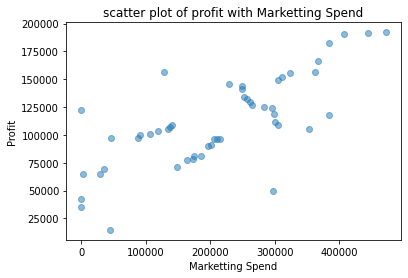

In [ ]:
plt.scatter(dataset['Marketting spend'], dataset['Profit'], alpha=0.5)
plt.title('scatter plot of profit with Marketting Spend')
plt.xlabel('Marketting Spend')
plt.ylabel('Profit')
plt.show()

In [ ]:
dataset.shape

(50, 5)

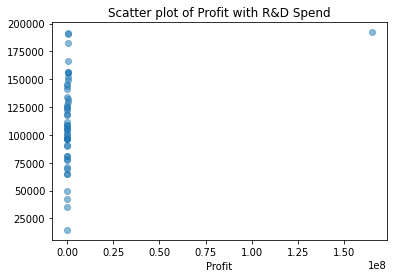

In [ ]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with R&D Spend')
plt.xlabel('Profit')
plt.show()

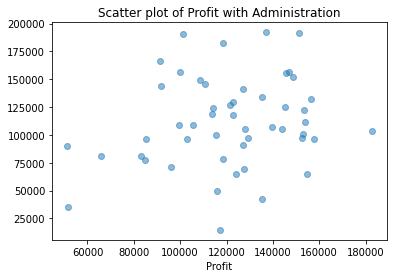

In [ ]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

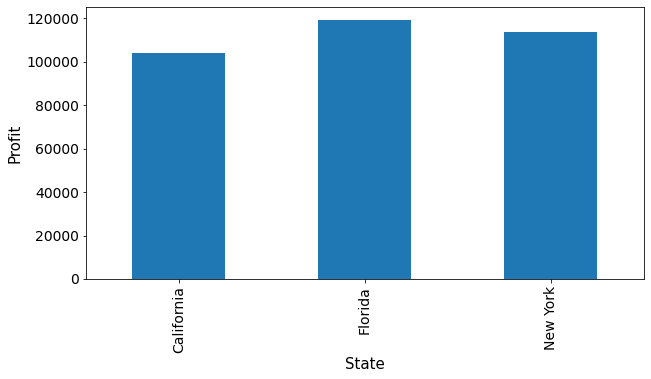

In [ ]:
# Create the figure object
ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)
# Set x and y-labels
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)

In [ ]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [ ]:
# Create dummy variables for the categorial variable State
dataset['NewYork_State'] = np.where(dataset['State'] == 'New York', 1, 0)
dataset['California_State'] = np.where(dataset['State'] == 'California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State'] == 'Florida', 1, 0)

# Drop the original column State from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)

In [ ]:
dataset.head()

,R&D Spend,Administration,Marketting spend,Profit,NewYork_State,California_State,Florida_State
0,1.651653e+08,136897.80,471784.10,192261.83,1,0,0
1,1.625977e+05,151377.59,443898.53,191792.06,0,1,0
2,1.534415e+05,101145.55,407934.54,191050.39,0,0,1
3,1.443724e+05,118671.85,383199.62,182901.99,1,0,0
4,1.421073e+05,91391.77,366168.42,166187.94,0,0,1


In [ ]:
dependent_variable = 'Profit'

In [ ]:
#create a list of independent variables
independent_variables = dataset.columns.tolist()

In [ ]:
independent_variables.remove(dependent_variable)

In [ ]:
independent_variables

['R&D Spend',
 'Administration',
 'Marketting spend',
 'NewYork_State',
 'California_State',
 'Florida_State']

In [ ]:
# Create the data of independent variables
x = dataset[independent_variables].values

# Create the dependent variable data
y = dataset[dependent_variable].values

In [ ]:
# Splitting the dataset into the Training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [ ]:
# Transforming data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train[0:10]

array([[3.35990268e-04, 4.86551738e-01, 4.54942865e-01, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.78593665e-04, 3.17301499e-01, 4.35617987e-01, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [4.56081559e-04, 8.72588661e-01, 2.85847001e-01, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.81088438e-04, 1.00000000e+00, 4.46809611e-01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [5.55498841e-04, 5.91036453e-01, 6.25115535e-01, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [7.88895072e-04, 8.85689589e-01, 6.86493419e-01, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [7.26200989e-04, 9.89225716e-01, 5.43708277e-01, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [6.05593125e-06, 6.84798100e-01, 4.03559594e-03, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.28186271e-06, 4.32296427e-03, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 

In [ ]:
# Fitting multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred))

30399.856937010907

In [ ]:
r2_score(y_test, y_pred)

0.26977541979255304